In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import mglearn
from IPython.display import display
plt.rc('font', family='Verdana')

In [2]:
np.__version__

'1.16.2'

In [3]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [17]:
print(iris_dataset['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [26]:
print(iris_dataset['target_names'])
print(iris_dataset['target'])
print(iris_dataset['data'].shape)

['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
(150, 4)


In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0)

In [37]:
print("Обучающая выборка делится 75% на 25%\n")
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

Обучающая выборка делится 75% на 25%

X_train:  (112, 4)
X_test:  (38, 4)
y_train:  (112,)
y_test:  (38,)



Создаем матрицу рассеяния из dataframe библиотеки Pandas и выводим их



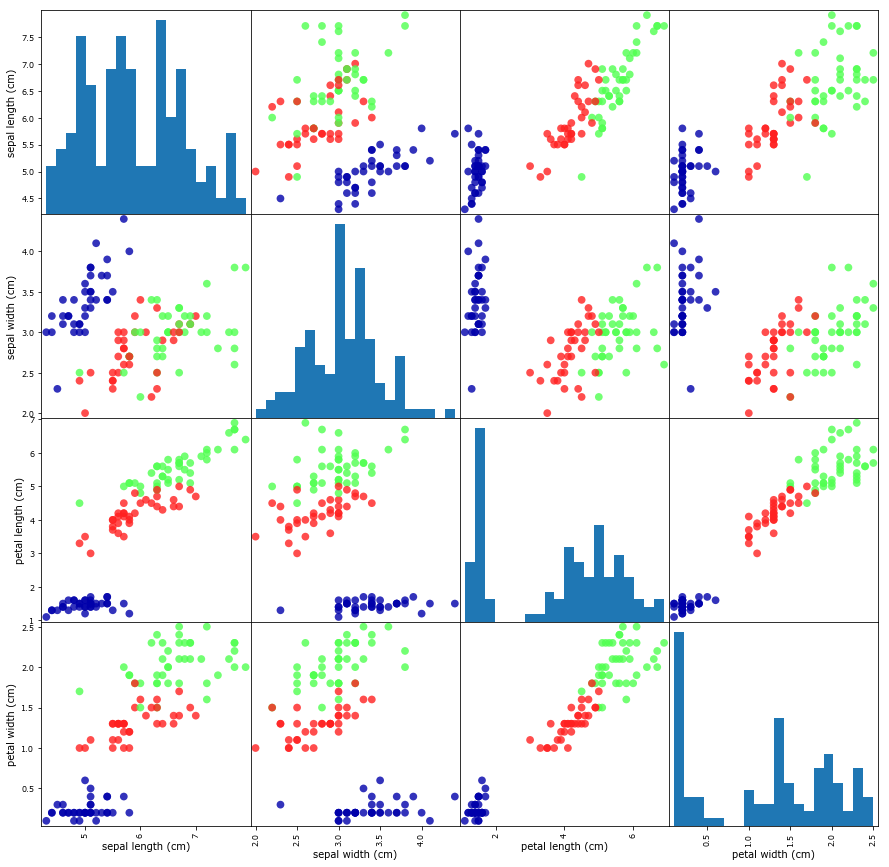

In [40]:
print("\nСоздаем матрицу рассеяния из dataframe библиотеки Pandas и выводим их\n")
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)
grr = pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(15,15),
                       marker='o', hist_kwds={'bins' : 20 }, s=60,
                       alpha=.8, cmap=mglearn.cm3)


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [44]:
# Представим что мы у нас есть новые данные по цветку ириса
# Чашелистик = 5см, ширина чашелистика = 2.9
# Длина лепестка = 1, ширина лепестка = 0.2
X_new = np.array([[5,2.9,1,0.2]])
print('Форма массива X_new: {}'.format(X_new.shape))

Форма массива X_new: (1, 4)


In [46]:
# Делаем прогноз на основе алгоритма k ближайших соседей
prediction = knn.predict(X_new)
print('Прогноз: {}'.format(prediction))
print('Спрогнозированная метка: {}'.format(iris_dataset['target_names'][prediction]))

Прогноз: [0]
Спрогнозированная метка: ['setosa']


In [49]:
# Проверка оценка качества модели, чтобы убедится всё ли мы сделали правильно
y_pred = knn.predict(X_test)
print('Прогнозы для тестового набора:\n {}'.format(y_pred))
print('Правильность на тестовом наборе: {:.2f}'.format(knn.score(X_test, y_test)))

Прогнозы для тестового набора:
 [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]
Правильность на тестовом наборе: 0.97
